In [9]:
import torch
# import torchvision
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
from scipy.io import savemat, loadmat
from tqdm import tqdm
from torch.nn import DataParallel
import csv
from numba import njit, jit
import pandas as pd
import os
from scipy.special import rel_entr
from sklearn.metrics import mutual_info_score
import nibabel as nb
import skimage
from glob import glob

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [13]:
ses_1_sub_1 = sorted(glob("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/*.png"))
# ses_1_sub_1.pop(0)
ses_2_sub_1 = sorted(glob("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M02/axial/*.png"))
# ses_2_sub_1.pop(0)
# ses_1_sub_2 = sorted(os.listdir("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/images/NTL-004/ses-01/axial/"))

In [52]:
# img = plt.imread(ses_2_sub_1[70])
# # print(img.shape)
# img_gray = rgb2gray(img)
# # plt.imshow(img_gray)
# img_gray_flatten = img_gray.flatten()
# plt.hist(ses_1_sub_1_data)
# max(ses_1_sub_1_data)
# ses_1_sub_1_data = np.round(ses_1_sub_1_data, decimals=3)

In [39]:
ses_1_sub_1_data = []
ses_2_sub_1_data = []
for i in range(len(ses_1_sub_1)):
    print(ses_1_sub_1[i])
    temp_ses1 = plt.imread(ses_1_sub_1[i])
    temp_ses1_gray = rgb2gray(temp_ses1)
    # plt.imsave("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01_gray", )
    print(temp_ses1_gray.shape)

    # temp_ses1_gray = (temp_ses1_gray-np.min(temp_ses1_gray))/(np.max(temp_ses1_gray)-np.min(temp_ses1_gray))
    temp_ses2 = plt.imread(ses_2_sub_1[i])
    temp_ses2_gray = rgb2gray(temp_ses2)
    print(temp_ses2_gray.shape)
    # temp_ses2_gray = (temp_ses2_gray-np.min(temp_ses2_gray))/(np.max(temp_ses2_gray)-np.min(temp_ses2_gray))
    temp_ses1_flatten = temp_ses1_gray.flatten()
    temp_ses2_flatten = temp_ses2_gray.flatten()
    ses_1_sub_1_data.extend(temp_ses1_flatten)
    ses_2_sub_1_data.extend(temp_ses2_flatten)

/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/001.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/002.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/003.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/004.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/005.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/006.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/007.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/008.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/009.png
(189, 157)
(189, 157)
/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/Images/M01/axial/010.png
(1

In [27]:
# x = plt.imread("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/THS_images/ses_2/img_021.png")
# print(x.shape)

In [28]:
# plt.imshow(rgb2gray(x[:,:,0:3]))
# plt.show()
# rgb2gray(x[:,:,0:3])

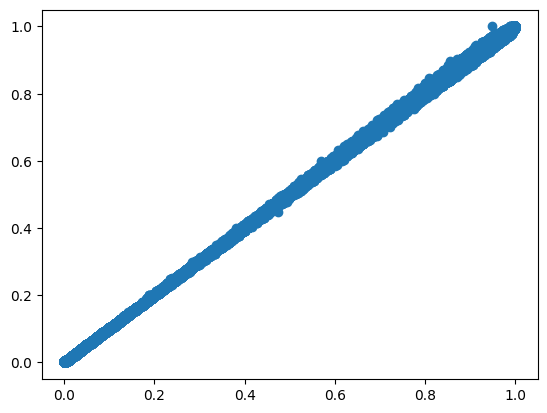

In [13]:
# plt.hist(ses_1_sub_1_data, 1000, alpha=0.5, label='x')
# plt.hist(ses_2_sub_1_data, 1000, alpha=0.5, label='y')
# plt.legend(loc='upper right')
# plt.show()

plt.scatter(ses_1_sub_1_data, ses_2_sub_1_data)max(ses_1_sub_1_data)

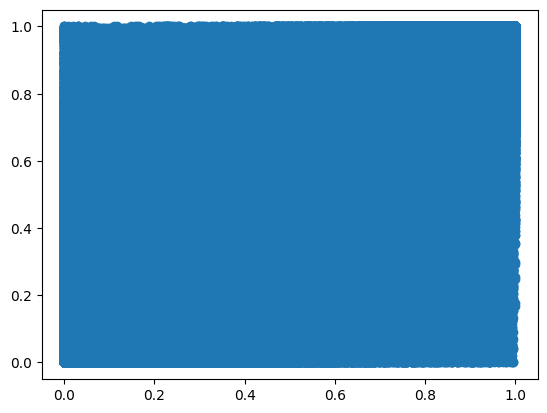

In [53]:
plt.scatter(ses_2_sub_1_data, ses_1_sub_1_data)

In [55]:
# plt.scatter([0,0,0,0,0], [0,0,0,0,0])
np.unique(ses_2_sub_1_data)

array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.027, 0.031,
       0.035, 0.039, 0.043, 0.047, 0.051, 0.055, 0.059, 0.063, 0.067,
       0.071, 0.075, 0.078, 0.082, 0.086, 0.09 , 0.094, 0.098, 0.102,
       0.106, 0.11 , 0.114, 0.118, 0.122, 0.125, 0.129, 0.133, 0.137,
       0.141, 0.145, 0.149, 0.153, 0.157, 0.161, 0.165, 0.169, 0.173,
       0.176, 0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  , 0.204, 0.208,
       0.212, 0.216, 0.22 , 0.224, 0.227, 0.231, 0.235, 0.239, 0.243,
       0.247, 0.251, 0.255, 0.259, 0.263, 0.267, 0.271, 0.274, 0.278,
       0.282, 0.286, 0.29 , 0.294, 0.298, 0.302, 0.306, 0.31 , 0.314,
       0.318, 0.322, 0.325, 0.329, 0.333, 0.337, 0.341, 0.345, 0.349,
       0.353, 0.357, 0.361, 0.365, 0.369, 0.373, 0.376, 0.38 , 0.384,
       0.388, 0.392, 0.396, 0.4  , 0.404, 0.408, 0.412, 0.416, 0.42 ,
       0.423, 0.427, 0.431, 0.435, 0.439, 0.443, 0.447, 0.451, 0.455,
       0.459, 0.463, 0.467, 0.471, 0.474, 0.478, 0.482, 0.486, 0.49 ,
       0.494, 0.498,

In [9]:
# img = nb.load("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/S01/M02/Results/wc1s2017-10-14_12-44-131638-00001-00176-1_RFSC_MTsat.nii")
# img_data = img.get_fdata()
# ax_slices = img_data.shape[1]
# for i in range(ax_slices):

#     print(i)
#     test_image = skimage.color.gray2rgb(np.rot90(img_data[:,i,:],k=1))
#     # print(test_image.shape)
#     test_image = (test_image-np.min(test_image))/(np.max(test_image)-np.min(test_image))
#     plt.imsave("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/THS_images/ses_2"+"/img_"+str(f"{i:03}")+".png", test_image)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


/tmp/ipykernel_1004854/1148818695.py:9: RuntimeWarning: invalid value encountered in divide
  test_image = (test_image-np.min(test_image))/(np.max(test_image)-np.min(test_image))


45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188


In [3]:
img = nb.load("/home/neuroimaging/Desktop/Sarvagya_work/Harmonization/S01/M02/Results/wc1s2017-10-14_12-44-131638-00001-00176-1_RFSC_MTsat.nii")
img_data = img.get_fdata()
print(img_data.shape)

(157, 189, 156)


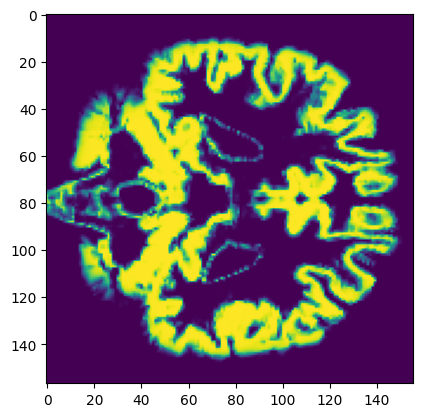

In [5]:
x = img_data[:,70,:]
plt.imshow(x)
plt.show()